### *A/B Testing*

#### *Introdution*

It's a website with various articles about programming. And we have an idea - If we change the title of article - the metric CTR (Click-Throught Rate) goes up

In [285]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [286]:
df = pd.read_csv('/Users/egorkovalev/Downloads/article_ab_test.csv')

In [287]:
df.shape

(294478, 5)

In [288]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0


In [289]:
df.timestamp = pd.to_datetime(df.timestamp)

In [290]:
df.timestamp.max() - df.timestamp.min()

Timedelta('21 days 23:59:49.081927')

 *We ran an A/B test and waited 22 days. Then we extracted the data.*




#### *Data info*
-  There are two groups in a column "group": treatment and control groups.

- Column landing_page shows which version of the website the user sees. 

- And the converted column shows if the user has clicked the button

In [291]:
df.shape[0] - (df.shape[0] - df.user_id.nunique()) 

290584

In [292]:
df.shape[0] - df.user_id.nunique() 

3894

 There are:

 - 290584 unique users 
 - 3894 non unique

#### *Clearing the data*

*We showed the control group the old version of the site and the treatment group the new version of the site, but we will see exceptions in future code. And we should delete them.*


In [325]:
a = df[(df.group == 'control') & (df.landing_page == 'new_page')]

In [294]:
b = df[(df.group == 'treatment') & (df.landing_page == 'old_page')]

In [295]:
a.count()[0] + b.count()[0]

3893

In [296]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [297]:
df = df.drop(a.index)
df = df.drop(b.index)

In [298]:
df.shape

(290585, 5)

In [299]:
df.shape[0] - df.user_id.nunique() 

1

In [300]:
df[df.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,1
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [301]:
df.drop_duplicates(subset='user_id', keep='last', inplace=True)

In [302]:
df.shape[0] - df.user_id.nunique() 

0

#### *Hypothesis*

*We have two hypothesis:*

- H0 - There isn't difference between old and new version of article
- H1 - There is significant difference between old and new version of article

In [303]:
color=['darkslategray', 'darkcyan', 'lightseagreen', 'skyblue', 'teal', 'cadetblue', 'lightblue']

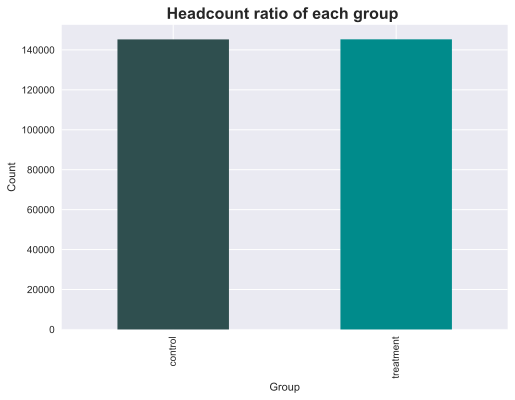

In [329]:
df.groupby('group')['user_id'].count().plot.bar(color=color)

plt.title('Headcount ratio of each group ', fontsize=16, fontweight='heavy')
plt.xlabel('Group')
plt.ylabel('Count')
plt.style.use('seaborn')

*There are two groups with equal counts*

#### *Total change calculation*

In [305]:
df_control = df[df.group == 'control']

In [306]:
df_treatment = df[df.group == 'treatment']

In [307]:
df_control.converted.mean() 

0.11381251979018957

In [308]:
df_treatment.converted.mean() 

0.19206523983208312

*There we see a visible change of CTR*

#### *Test the significance of the result*

In [309]:
df['timestamp'] = df.timestamp.astype('str').str[:10]
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

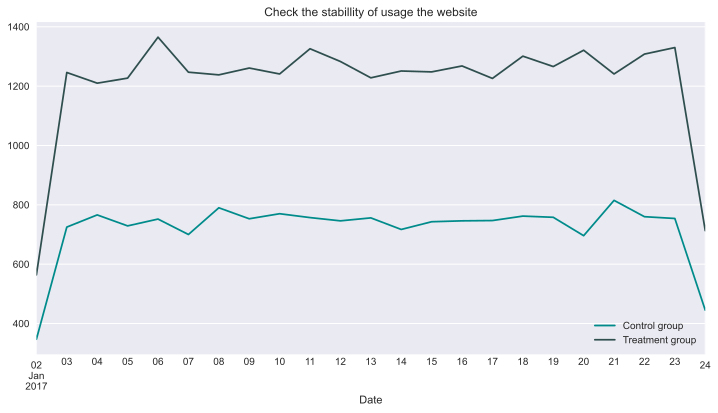

In [321]:
df[df.group == 'control'].groupby('timestamp')['converted'].sum().plot.line(figsize = (12, 6), color='darkcyan')
df[df.group == 'treatment'].groupby('timestamp')['converted'].sum().plot.line(color=color)
plt.title('Check the stabillity of usage the website')
plt.xlabel('Date')
plt.legend(['Control group', 'Treatment group'])


#### *The chart does not show a strong increase or decrease.*

 *We should check this because any article topic can become very popular abruptly and we will think that the headline improved it ( This is a First Type Error).*


In [323]:
z, p_value = proportions_ztest([df_control.converted.sum(), df_treatment.converted.sum()],
                               [len(df_control), len(df_treatment)],
                                 alternative='two-sided'
                               )

In [324]:
print('{0:0.10f}'.format(p_value))

0.0000000000


#### *Conclusion*



*Because there are so many data in dataset, we have accurate result, and we can say for sure, that we have significant difference*